In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [9]:
# Tentukan path file dataset di Google Drive
path = '/content/drive/My Drive/Dataset/credit_card_dataset.csv'

# Baca dataset menggunakan pandas
df = pd.read_csv(path)

# Tampilkan beberapa baris pertama dari dataset
print(df.head())

        Card_Number  CardHolder_Name  Age  Gender  Balance  Points
0  4822769126150450        Joy Brown   30  Female  4973.92    8803
1  4543527089368031   Stephanie Diaz   50    Male  2730.04    7512
2  4244033168703950    Diane Ramirez   44  Female  2259.53    2081
3  4570661591511312   Natasha Miller   68    Male  3053.43    3795
4  4832339499753209  Rebecca Ramirez   41  Female  1183.49    2205


In [10]:
# Menghapus kolom 'CustomerID' dan 'Gender' dari dataframe
df = df.drop(['Card_Number', 'CardHolder_Name', 'Gender'], axis=1) # axis=1 supaya menghapus kolom, bukan baris

# Menampilkan dataframe setelah menghapus kolom
print(df.head())

   Age  Balance  Points
0   30  4973.92    8803
1   50  2730.04    7512
2   44  2259.53    2081
3   68  3053.43    3795
4   41  1183.49    2205


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

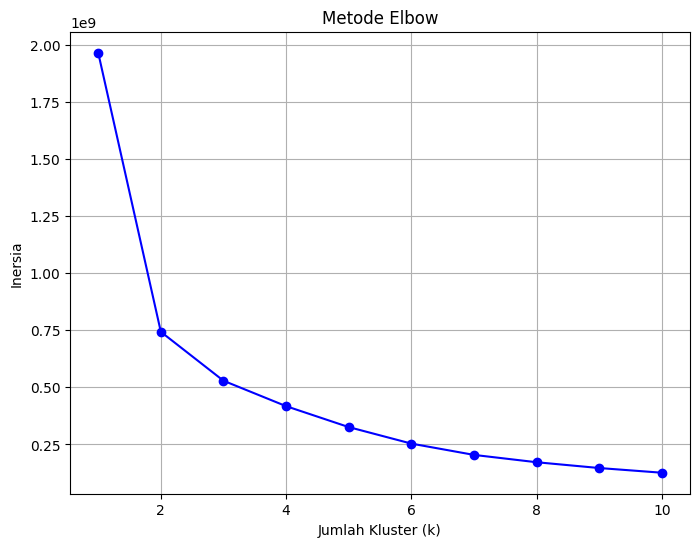

In [11]:
# Pilih atribut yang akan digunakan untuk klasterisasi
data = df[['Age', 'Balance', 'Points']]

# Inisialisasi daftar untuk menyimpan nilai inersia (inertia) kluster
inertia = []

# Iterasi untuk jumlah kluster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan metode elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inersia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


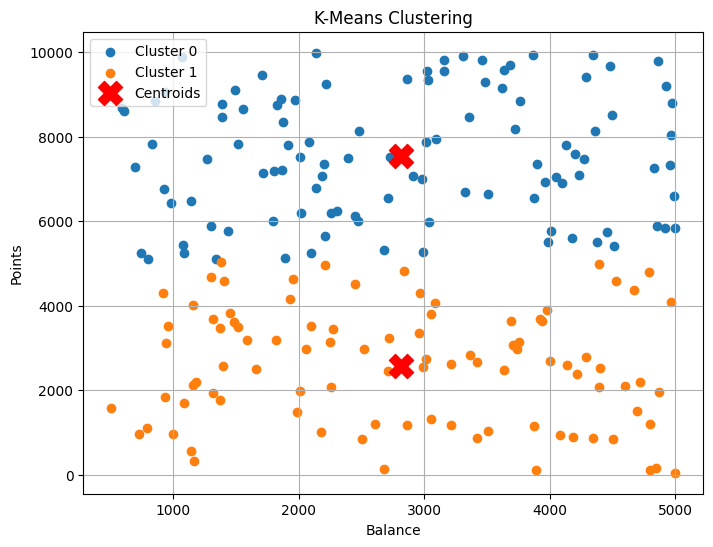

In [34]:
# Inisialisasi model K-Means dengan 2 kluster
kmeans = KMeans(n_clusters=2)

# Melakukan klasterisasi
df['label'] = kmeans.fit_predict(data)

# Visualisasikan berdasarkan label
plt.figure(figsize=(8, 6))

# Plot kluster
for label in range(2):
    plt.scatter(data[df['label'] == label]['Balance'],
                data[df['label'] == label]['Points'],
                label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Inisialisasi daftar untuk menyimpan nilai silhouette score
silhouette_scores = []

# Iterasi untuk jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan nilai silhouette score
for k, score in enumerate(silhouette_scores, start=2):
    print(f'Silhouette Score untuk k={k}: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score untuk k=2: 0.5034465534934411
Silhouette Score untuk k=3: 0.378390399985544
Silhouette Score untuk k=4: 0.3856948543326294
Silhouette Score untuk k=5: 0.3757411375228572
Silhouette Score untuk k=6: 0.3946454774084191
Silhouette Score untuk k=7: 0.4070203784140698
Silhouette Score untuk k=8: 0.40201244638681827
Silhouette Score untuk k=9: 0.4133308970949017
Silhouette Score untuk k=10: 0.4119603711229013


In [35]:
# Inisialisasi daftar untuk menyimpan nilai Davies-Bouldin Index score
davies_bouldin_scores = []

# Iterasi untuk jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    db_score = davies_bouldin_score(data, labels)
    davies_bouldin_scores.append(db_score)

# Menampilkan nilai Davies-Bouldin Index score
for k, score in enumerate(davies_bouldin_scores, start=2):
    print(f'Davies-Bouldin Index Score untuk k={k}: {score}')

Davies-Bouldin Index Score untuk k=2: 0.7225811330511586
Davies-Bouldin Index Score untuk k=3: 0.953520353722685
Davies-Bouldin Index Score untuk k=4: 0.8707500835561912
Davies-Bouldin Index Score untuk k=5: 0.9114478541639347
Davies-Bouldin Index Score untuk k=6: 0.858345711871901
Davies-Bouldin Index Score untuk k=7: 0.7538288361178355
Davies-Bouldin Index Score untuk k=8: 0.7421033703568132
Davies-Bouldin Index Score untuk k=9: 0.7161533255336372
Davies-Bouldin Index Score untuk k=10: 0.7208383192817782


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [36]:
# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index score
calinski_harabasz_scores = []

# Iterasi untuk jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch_score = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores.append(ch_score)

# Menampilkan nilai Calinski-Harabasz Index score
for k, score in enumerate(calinski_harabasz_scores, start=2):
    print(f'Calinski-Harabasz Index Score untuk k={k}: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index Score untuk k=2: 325.86013722963133
Calinski-Harabasz Index Score untuk k=3: 267.76717543379374
Calinski-Harabasz Index Score untuk k=4: 242.43118314579937
Calinski-Harabasz Index Score untuk k=5: 245.55716055632382
Calinski-Harabasz Index Score untuk k=6: 262.39466203572994
Calinski-Harabasz Index Score untuk k=7: 278.19098496101236
Calinski-Harabasz Index Score untuk k=8: 286.784252059724
Calinski-Harabasz Index Score untuk k=9: 297.0776463963378
Calinski-Harabasz Index Score untuk k=10: 309.1501292329857
